<a href="https://colab.research.google.com/github/Yufanzh/time_series_analysis/blob/main/VARMA_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

#VARMA(p,q)

In [4]:
# load specific forecasting model
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
%pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load datasets
df = pd.read_csv('./M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('./PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [8]:
# copy the previous analysis
df2 = df.join(sp)

In [11]:
auto_arima(df2['Money'], maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
auto_arima(df2['Spending'], maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [13]:
# the middle term is the i term (1,2,1) and (1,1,2)
df_transformed = df2.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [15]:
df_transformed.shape

(250, 2)

In [16]:
nobs = 12
train = df_transformed.iloc[:-nobs]
test = df_transformed.iloc[-nobs:]

## Fit the VARMA(1,2) Model
### This may take awhile

In [17]:
model = VARMAX(train, order=(1,2), trend='c')
results = model.fit(maxiter=1000, dips=False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.252
,+ intercept,AIC,4606.503
Date:,"Thu, 14 Mar 2024",BIC,4665.532
Time:,04:36:03,HQIC,4630.293
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"1.09, 0.00",Jarque-Bera (JB):,"524.12, 105.46"
Prob(Q):,"0.30, 0.97",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.35, 3.03",Skew:,"1.30, -0.32"


## Predict the next 12 values

unlike the VAR model we used in the previous section, the VARMAX.forecast() func won't require that we pass in a number of previous observations, and it will provide an extended DateTime index

In [18]:
df_forecast = results.forecast(12)
df_forecast

,Money,Spending
2015-01-01,-9.315895,35.188437
2015-02-01,-9.977139,-2.678072
2015-03-01,-0.502798,-0.528719
2015-04-01,-1.152068,-0.258689
2015-05-01,0.297176,0.004812
2015-06-01,-0.021861,0.002008
2015-07-01,0.234190,0.039929
2015-08-01,0.148758,0.033599
2015-09-01,0.198543,0.039983
2015-10-01,0.178604,0.038084


In [20]:
# reverse the difference
# add the most recent first difference from the training side of the original dataset to the forecast
df_forecast['Money_1d'] = (df2['Money'].iloc[-nobs-1] - df2['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df2['Money'].iloc[-nobs-1] + df_forecast['Money_1d'].cumsum()

In [21]:
# reverse the difference
# add the most recent first difference from the training side of the original dataset to the forecast
df_forecast['Spending_1d'] = (df2['Spending'].iloc[-nobs-1] - df2['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df2['Spending'].iloc[-nobs-1] + df_forecast['Spending_1d'].cumsum()

<Axes: xlabel='Date'>

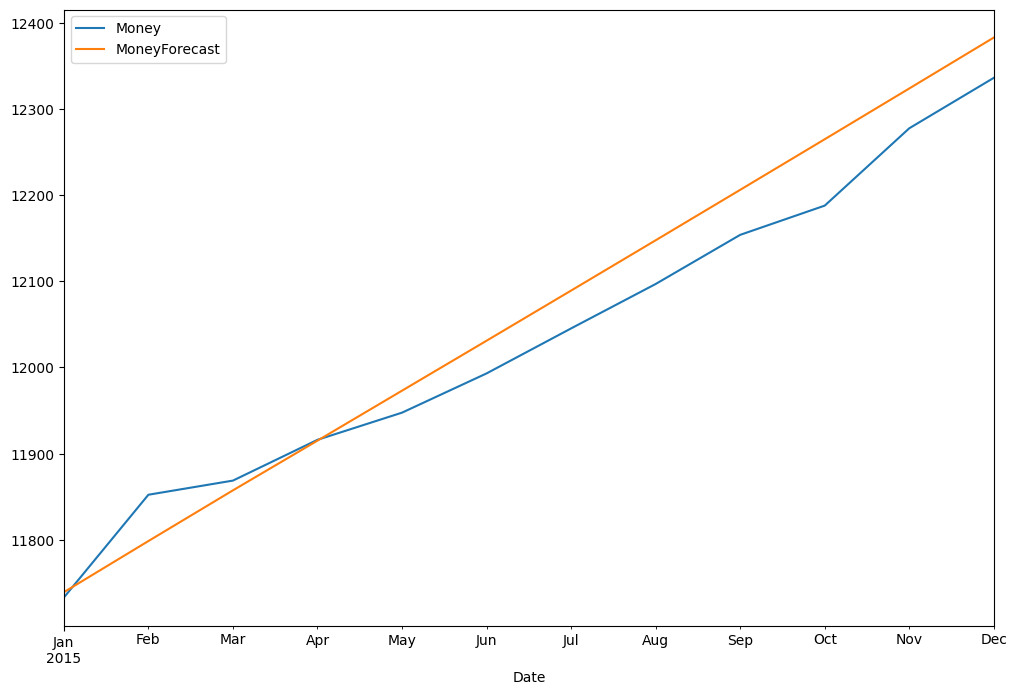

In [22]:
df2['Money'][-nobs:].plot(legend=True, figsize=(12,8)).autoscale(axis='x', tight=True)
df_forecast['MoneyForecast'].plot(legend=True)

<Axes: xlabel='Date'>

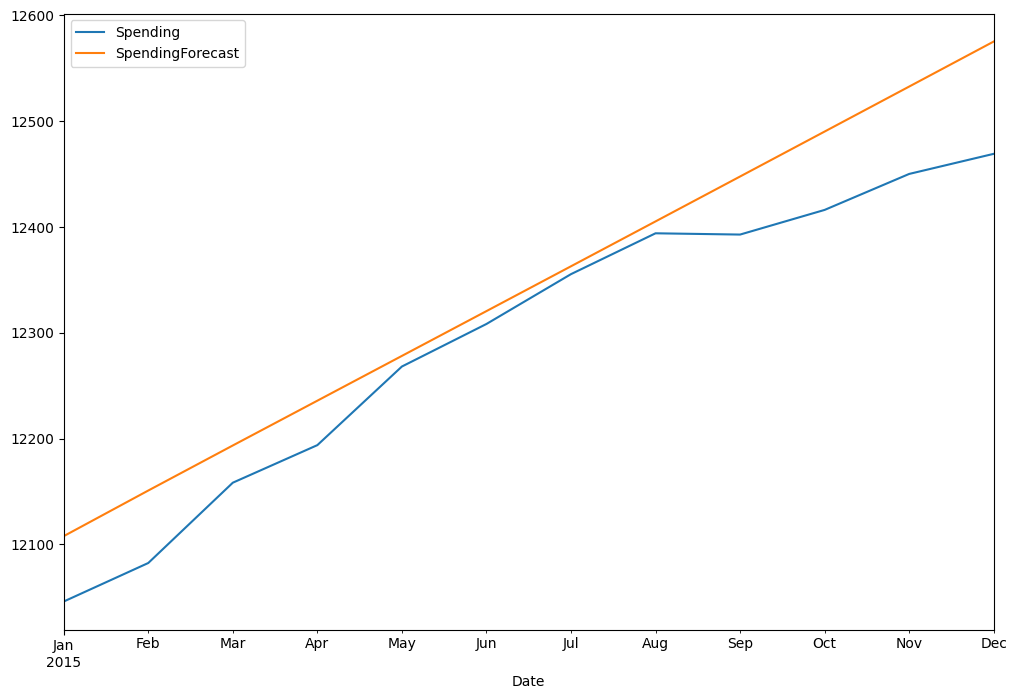

In [23]:
df2['Spending'][-nobs:].plot(legend=True, figsize=(12,8)).autoscale(axis='x', tight=True)
df_forecast['SpendingForecast'].plot(legend=True)

In [24]:
RMSE1 = rmse(df2['Money'][-nobs:], df_forecast['MoneyForecast'])

In [25]:
RMSE1

43.40153209155376

In [26]:
RMSE2 = rmse(df2['Spending'][-nobs:], df_forecast['SpendingForecast'])
RMSE2

56.65888578512296

## lET'S